In [1]:
from utils import *

In [ ]:
logperm, perm, poro, timesteps, bhp, pressure, saturation, well_locs, well_locs_mask = load_data()

In [ ]:
plot_well_locs(well_locs, logperm)
plot_bhps(bhp, timesteps, range(20,25))

In [ ]:
plot_static(poro, perm, well_locs, 10, figsize=(20,4))

In [ ]:
plot_dynamic(pressure, logperm, well_locs, nrows=3, multiplier=10, cmap='inferno', dtitle='Pressure')
plot_dynamic(saturation, logperm, well_locs, nrows=3, multiplier=10, cmap='jet', dtitle='CO2 Saturation')

***
# END

In [13]:
inj_locs = loadmat('simulations/inj_locations.mat')['inj_locations']
mon_locs = loadmat('simulations/mon_locations.mat')['mon_locations']


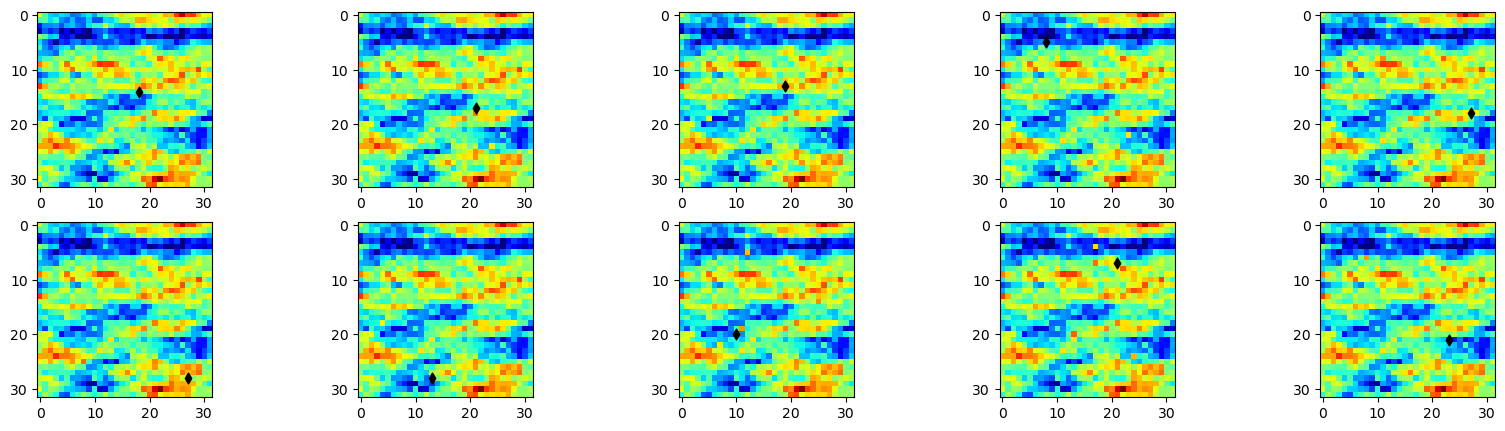

In [54]:
plt.figure(figsize=(20,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(loadmat('simulations/modrock.mat')['modrock'][i][0]['poro'][0][0].reshape(5,32,32)[0], cmap='jet')
    plt.scatter(inj_locs[i][0][0][0], inj_locs[i][0][0][1], c='k', marker='d', s=30)

In [55]:
import pyvista as pv

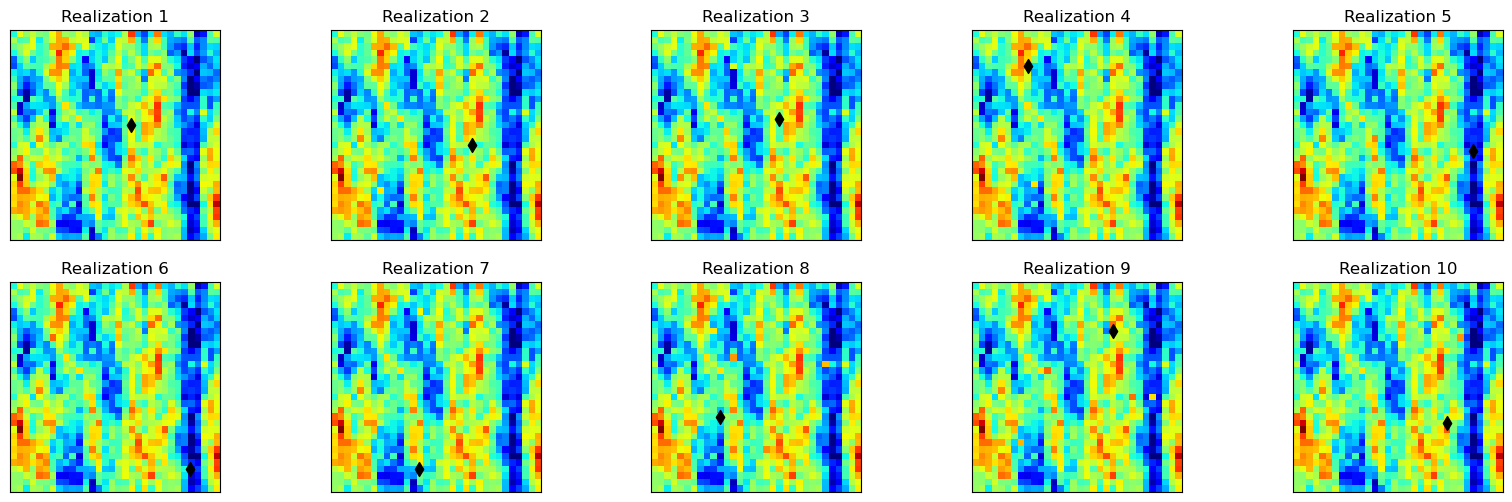

In [151]:
k = 0
fig, axs = plt.subplots(2, 5, figsize=(20,6))
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(np.rot90(loadmat('simulations/modrock.mat')['modrock'][k][0]['poro'][0][0].reshape(5,32,32)[0], 3), cmap='jet')
        axs[i,j].scatter(inj_locs[k][0][0][0], inj_locs[k][0][0][1], color='k', s=50, marker='d')
        axs[i,j].set(xticks=[], yticks=[], title='Realization {}'.format(k+1))
        k += 1
plt.show()

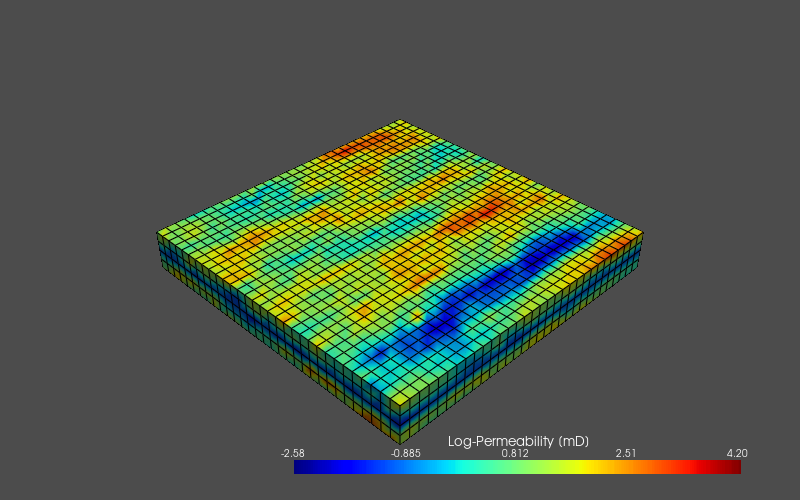

In [132]:
temp = np.log10(1.01325E15*np.flip(loadmat('simulations/modrock.mat')['modrock'][-1][0]['perm'][0][0][:,0].reshape(5,32,32).T))
p = pv.Plotter()
p.add_mesh(temp, cmap='jet', show_edges=True, scalar_bar_args={'title':'Log-Permeability [mD]'})
p.show(jupyter_backend='static', window_size=(800,500))

In [234]:
temp = loadmat('simulations/results.mat')['results'].reshape(10,75)
print(temp.shape)

(10, 75)


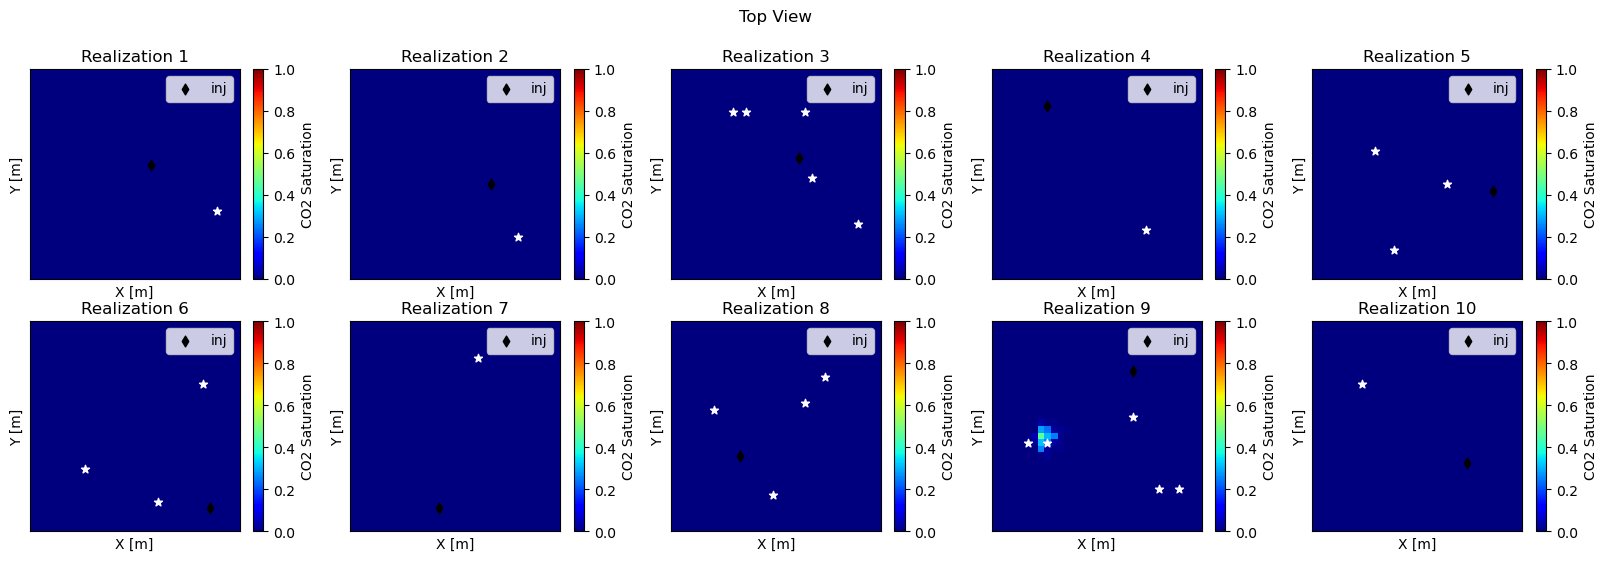

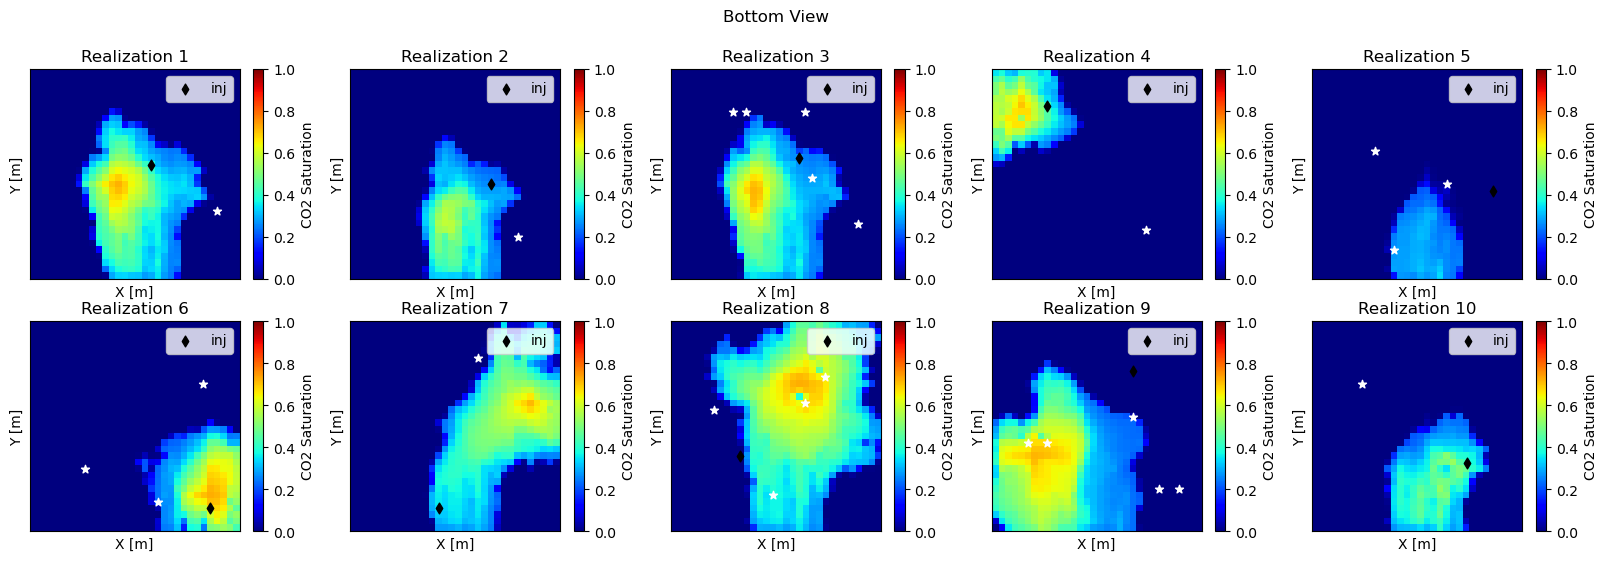

In [360]:
fig, axs = plt.subplots(2, 5, figsize=(20, 6))
k = 0
for i in range(2):
    for j in range(5):
        monitorwell = pd.DataFrame(mon_locs[k][0], columns=['X','Y'])
        im = axs[i,j].imshow(temp[k, -1]['s'][0][0][:,-1].reshape(5,32,32)[0].T, cmap='jet', vmin=0, vmax=1)
        axs[i,j].scatter(inj_locs[k][0][0][0], inj_locs[k][0][0][1], marker='d', color='k', s=30, label='inj')
        axs[i,j].scatter(monitorwell['Y'], monitorwell['X'], c='w', marker='*')
        axs[i,j].set(xticks=[], yticks=[], title='Realization {}'.format(k+1), xlabel='X [m]', ylabel='Y [m]')
        axs[i,j].legend()
        plt.colorbar(im, label='CO2 Saturation')
        k += 1
plt.suptitle('Top View')
plt.show()

fig, axs = plt.subplots(2, 5, figsize=(20, 6))
k = 0
for i in range(2):
    for j in range(5):
        monitorwell = pd.DataFrame(mon_locs[k][0], columns=['X','Y'])
        im = axs[i,j].imshow(temp[k, -1]['s'][0][0][:,-1].reshape(5,32,32)[-1].T, cmap='jet', vmin=0, vmax=1)
        axs[i,j].scatter(inj_locs[k][0][0][0], inj_locs[k][0][0][1], marker='d', color='k', s=30, label='inj')
        axs[i,j].scatter(monitorwell['Y'], monitorwell['X'], c='w', marker='*')
        axs[i,j].set(xticks=[], yticks=[], title='Realization {}'.format(k+1), xlabel='X [m]', ylabel='Y [m]')
        axs[i,j].legend()
        plt.colorbar(im, label='CO2 Saturation')
        k += 1
plt.suptitle('Bottom View')
plt.show()

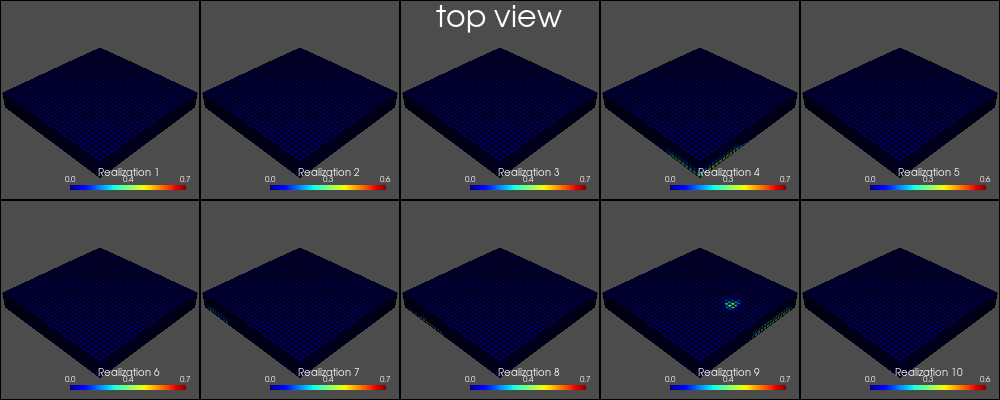

In [358]:
p = pv.Plotter(shape=(2,5))
k = 0
for i in range(2):
    for j in range(5):
        p.subplot(i,j)
        cb_args = {'title':'Realization {}'.format(k+1), 'n_labels':3, 'fmt':'%.1f','title_font_size':10, 'label_font_size':8}
        p.add_mesh(np.flip(temp[k, -1]['s'][0][0][:,-1].reshape(5,32,32).T), cmap='jet', show_edges=True, scalar_bar_args=cb_args)
        if i==0 and j==2:
            p.add_text('top view', position='upper_edge', font_size=12)
        k += 1
p.show(jupyter_backend='static', window_size=(1000,400))

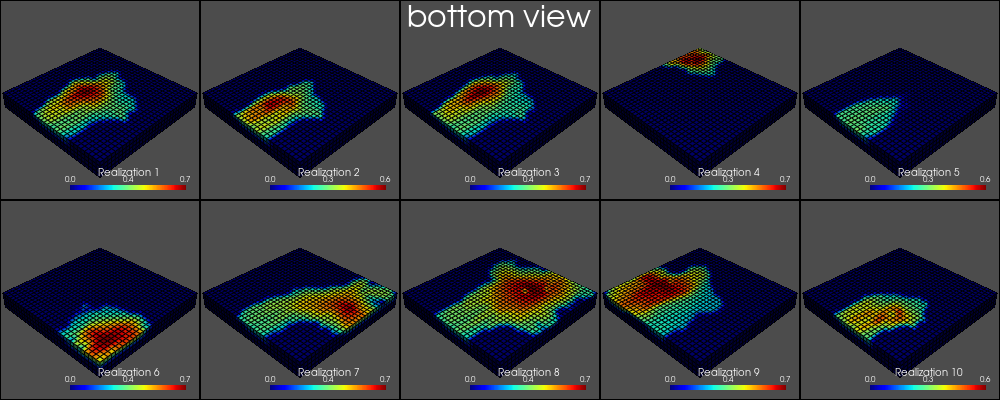

In [357]:
p = pv.Plotter(shape=(2,5))
k = 0
for i in range(2):
    for j in range(5):
        p.subplot(i,j)
        cb_args = {'title':'Realization {}'.format(k+1), 'n_labels':3, 'fmt':'%.1f','title_font_size':10, 'label_font_size':8}
        p.add_mesh((temp[k, -1]['s'][0][0][:,-1].reshape(5,32,32).T), cmap='jet', show_edges=True, scalar_bar_args=cb_args)
        if i==0 and j==2:
            p.add_text('bottom view', position='upper_edge', font_size=12)
        k += 1
p.show(jupyter_backend='static', window_size=(1000,400))

In [190]:
loadmat('simulations/results.mat')['results'][0][0][0][0][0][0]['s'][:,-1]

array([0., 0., 0., ..., 0., 0., 0.])

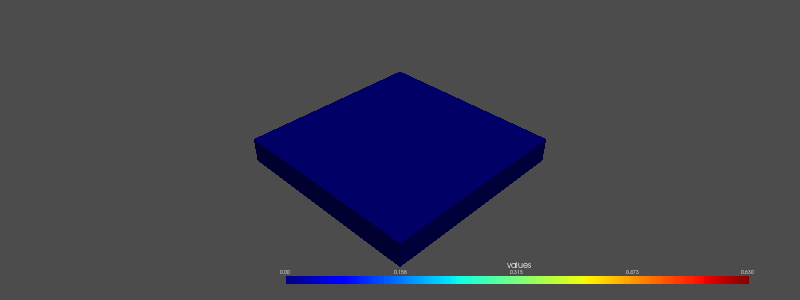

In [177]:
p = pv.Plotter()
p.add_mesh(np.flip(loadmat('simulations/results.mat')['results'][-1][-1][-1][-1][-1][-1]['s'][:,-1].reshape(5,32,32).T), cmap='jet')
p.show(jupyter_backend='static', window_size=(800,300))